# Import libraries and data 

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import seaborn as sns
import os
import pandas as pd
import numpy as np

dataset disponibile al seguente indirizzo: https://snap.stanford.edu/data/facebook-large-page-page-network.html

In [ ]:
df = pd.read_csv('C:/.../musae_facebook_target.csv')

In [3]:
G = nx.Graph()
G.add_nodes_from(df['id'])

In [4]:
ID = df['id'].values.tolist()

In [5]:
print(len(ID))

22470


In [6]:
facebook_id = df['facebook_id'].values.tolist()

In [7]:
pagename= df['page_name'].values.tolist()

In [8]:
pagetype = df['page_type'].values.tolist()

In [9]:
for i in range(len(G.nodes)):
    G.add_nodes_from([i], ID=ID[i], facebookid= facebook_id[i], pagename = pagename[i], pagetype = pagetype[i])

In [10]:
print(len(G.nodes))

22470


**Creazione liste dei nodi per le 4 diverse categorie (politician, tvshow, government e company)**

In [12]:
nome_nodo_politician = []
for i in range(len(G.nodes)):
    if (G.nodes[i]["pagetype"] == "politician"):
        nome_nodo_politician.append(i)


In [13]:
nome_nodo_tvshow = []
for i in range(len(G.nodes)):
    if (G.nodes[i]["pagetype"] == "tvshow"):
        nome_nodo_tvshow.append(i)

In [14]:
nome_nodo_government = []
for i in range(len(G.nodes)):
    if (G.nodes[i]["pagetype"] == "government"):
        nome_nodo_government.append(i)

In [15]:
nome_nodo_company = []
for i in range(len(G.nodes)):
    if (G.nodes[i]["pagetype"] == "company"):
        nome_nodo_company.append(i)

In [51]:
print(nome_nodo_tvshow)

[0, 27, 44, 52, 55, 68, 69, 70, 79, 96, 99, 101, 111, 117, 119, 140, 141, 151, 152, 153, 161, 175, 178, 185, 226, 233, 247, 258, 261, 263, 264, 265, 267, 274, 275, 281, 282, 295, 297, 298, 316, 344, 354, 357, 366, 367, 376, 381, 387, 390, 393, 396, 397, 410, 419, 428, 434, 441, 449, 450, 451, 452, 482, 495, 499, 507, 512, 526, 529, 545, 550, 558, 568, 573, 576, 580, 584, 597, 598, 608, 612, 633, 637, 641, 652, 653, 657, 661, 662, 669, 676, 681, 684, 700, 711, 717, 727, 735, 742, 746, 747, 749, 753, 758, 761, 769, 776, 779, 790, 794, 796, 798, 807, 810, 828, 834, 838, 839, 844, 851, 862, 887, 891, 893, 900, 909, 911, 912, 921, 924, 926, 928, 939, 941, 950, 958, 959, 963, 976, 980, 986, 991, 998, 1003, 1009, 1012, 1018, 1019, 1028, 1031, 1042, 1045, 1070, 1072, 1083, 1092, 1099, 1115, 1118, 1126, 1128, 1131, 1133, 1139, 1140, 1148, 1159, 1166, 1172, 1174, 1177, 1178, 1182, 1183, 1185, 1191, 1211, 1212, 1216, 1218, 1222, 1230, 1232, 1233, 1239, 1259, 1260, 1272, 1291, 1294, 1296, 1302, 13

In [1]:
# G.nodes.data()

In [11]:
df_archi = pd.read_csv('C:/.../musae_facebook_edges.csv')

In [12]:
df_archi.head()

id_1;id_2
0   0;18427
1   1;21708
2   1;22208
3   1;22171
4    1;6829

In [13]:
df_archi[["id1","id2"]] = df_archi["id_1;id_2"].str.split(";", expand=True)
df_archi= df_archi.drop(['id_1;id_2'], axis = 1)

In [14]:
df_archi.head()

id1    id2
0   0  18427
1   1  21708
2   1  22208
3   1  22171
4   1   6829

In [15]:
nodo_from= df_archi['id1'].values.tolist()
nodo_to = df_archi['id2'].values.tolist()

In [17]:
edges = []
for i in range(171002):
    edges.append((int(nodo_from[i]), int(nodo_to[i])))   

In [44]:
print(edges)

[(0, 18427), (1, 21708), (1, 22208), (1, 22171), (1, 6829), (1, 16590), (1, 20135), (1, 8894), (1, 15785), (1, 10281), (1, 22265), (1, 7136), (1, 22405), (1, 10379), (1, 13737), (1, 8533), (1, 14344), (1, 2812), (1, 5755), (1, 16260), (1, 15026), (1, 17370), (1, 17460), (1, 8049), (1, 5307), (1, 4987), (1, 18304), (1, 12305), (1, 19743), (1, 20024), (1, 21729), (1, 10554), (1, 11557), (1, 5228), (1, 9934), (2, 9048), (2, 6353), (2, 2629), (2, 11537), (2, 13205), (2, 22304), (2, 17728), (2, 19337), (2, 126), (2, 17554), (2, 8495), (2, 5857), (3, 16742), (3, 293), (3, 5826), (3, 3479), (3, 19753), (3, 17346), (3, 10945), (3, 22338), (3, 11319), (3, 9654), (4, 13645), (4, 20876), (4, 11446), (4, 16203), (4, 2830), (4, 2004), (4, 20624), (4, 21280), (4, 1182), (4, 21538), (4, 1443), (4, 11423), (4, 187), (4, 5730), (4, 2983), (4, 1489), (4, 6823), (4, 17695), (4, 11102), (4, 6390), (4, 17242), (4, 10018), (4, 5147), (4, 6427), (4, 14628), (4, 1882), (4, 22401), (4, 16128), (4, 12872), (4, 

In [18]:
G.add_edges_from(edges)

**Statistiche del grafo creato**

In [19]:
print("LUNGHEZZA DEI NODI E' " , len(G.nodes))
print("LUNGHEZZA DEGLI ARCHI E' " , len(G.edges))

LUNGHEZZA DEI NODI E'  22470
LUNGHEZZA DEGLI ARCHI E'  171002


In [24]:
G.is_directed()

False

In [65]:
density= nx.density(G)
print(density)

0.000677398715568023


In [75]:
list(nx.connected_components(G))

[{0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

In [76]:
sorted(d for n, d in G.degree()) #studiamo il grado dei nodi

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [78]:
nx.clustering(G)

{0: 0,
 1: 0.48128342245989303,
 2: 0.6515151515151515,
 3: 0.5111111111111111,
 4: 0.4203921568627451,
 5: 0.3722943722943723,
 6: 0.6333333333333333,
 7: 0.3333333333333333,
 8: 0.3333333333333333,
 9: 1.0,
 10: 1.0,
 11: 0,
 12: 0.2,
 13: 0.41911764705882354,
 14: 0.32255892255892255,
 15: 0.3333333333333333,
 16: 0,
 17: 0.16666666666666666,
 18: 0.5206258890469416,
 19: 0.05128205128205128,
 20: 0,
 21: 0,
 22: 0.5370370370370371,
 23: 0.6666666666666666,
 24: 0,
 25: 0.1,
 26: 0.8114942528735632,
 27: 0,
 28: 0.5,
 29: 0.3523809523809524,
 30: 0.1,
 31: 0.4,
 32: 0.2857142857142857,
 33: 1.0,
 34: 0,
 35: 0.26666666666666666,
 36: 0,
 37: 0.6666666666666666,
 38: 0.26666666666666666,
 39: 0.058823529411764705,
 40: 0.9,
 41: 0.2608695652173913,
 42: 0.06666666666666667,
 43: 0.5,
 44: 0.9935710111046172,
 45: 0.10256410256410256,
 46: 0.5277777777777778,
 47: 0.07692307692307693,
 48: 0.16666666666666666,
 49: 0.4043010752688172,
 50: 0.5842105263157895,
 51: 0.41818181818181815,

### Network reduction

In [20]:
print("Graph in connected: ")
print(nx.is_connected(G))
print(" ")
print("Number of connected components: ")
print(nx.number_connected_components(G))

components = nx.connected_components 

x = nx.node_connected_component(G, 0) 
y = max(nx.connected_components(G), key=len) 

G_1 = nx.Graph()
G_1 = G.subgraph(nodes=y) 

Graph in connected: 
True
 
Number of connected components: 
1


In [21]:
print("NODES: ", len(G_1.nodes))
print("EDGES: ", len(G_1.edges))

NODES:  22470
EDGES:  171002


**Lunghezza nodi: 22470**
**Lunghezza archi: 171002**

In [22]:
G_reduce = nx.Graph(G_1)
e = list(G_1.nodes) 

for cont in e:
    if (G_reduce.degree[cont] < 20): 
        G_reduce.remove_node(cont)
  

In [23]:
print("NODES: ", len(G_reduce.nodes))
print("EDGES: ", len(G_reduce.edges))
G_reduce.degree 

NODES:  4145
EDGES:  81246


DegreeView({1: 32, 4: 44, 5: 10, 14: 38, 18: 34, 22: 23, 26: 28, 32: 30, 41: 3, 44: 59, 49: 11, 50: 19, 56: 9, 61: 4, 64: 23, 72: 9, 74: 21, 77: 22, 81: 27, 88: 45, 90: 22, 94: 18, 95: 41, 98: 17, 99: 24, 101: 32, 104: 17, 106: 48, 109: 9, 113: 39, 120: 22, 123: 24, 126: 0, 127: 61, 128: 24, 129: 10, 130: 25, 133: 34, 134: 2, 138: 12, 142: 22, 157: 26, 159: 39, 165: 8, 167: 27, 173: 56, 176: 33, 186: 7, 187: 124, 191: 5, 196: 35, 197: 98, 206: 16, 210: 17, 212: 60, 216: 31, 217: 2, 218: 9, 222: 26, 227: 4, 230: 23, 238: 49, 240: 28, 246: 8, 252: 30, 254: 31, 257: 19, 270: 29, 277: 22, 280: 5, 283: 9, 285: 12, 290: 92, 293: 10, 296: 43, 301: 24, 304: 24, 305: 24, 306: 8, 307: 65, 321: 38, 323: 16, 325: 10, 326: 40, 334: 22, 337: 22, 339: 36, 341: 24, 343: 38, 347: 28, 350: 33, 356: 55, 361: 17, 364: 37, 365: 30, 367: 36, 368: 34, 369: 62, 370: 1, 371: 19, 375: 38, 377: 32, 382: 23, 383: 29, 391: 25, 392: 8, 395: 23, 402: 29, 403: 24, 405: 42, 406: 103, 407: 56, 410: 27, 412: 33, 426: 27

**Max connceted components**

In [24]:
#Prendo la più grande componenete connessa
y_1 = max(nx.connected_components(G_reduce), key=len) 
G_reduce_1 = G_reduce.subgraph(nodes=y_1)

In [25]:
print("NODES: ", len(G_reduce_1.nodes))
print("EDGES: ", len(G_reduce_1.edges))

NODES:  4138
EDGES:  81245


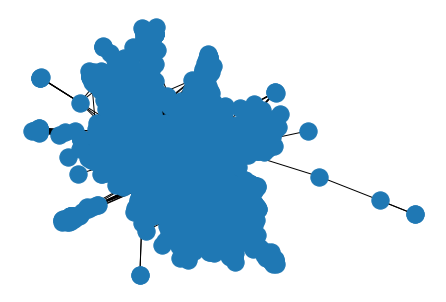

In [39]:
nx.draw(G_reduce_1)

In [118]:
def draw(G, pos, measures, measure_name):  
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    edges = nx.draw_networkx_edges(G, pos)  

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [41]:
pos = nx.spring_layout(G_reduce_1)

**statistiche grafo ridotto**

In [46]:
print("NODES: ", len(G_reduce_1.nodes))
print("EDGES: ", len(G_reduce_1.edges))

NODES:  4138
EDGES:  81245


In [40]:
density = nx.density(G_reduce_1)

In [41]:
print(density)

0.00949184486438561


In [43]:
# radius = nx.radius(G_reduce_1)

In [44]:
transitivity= nx.transitivity(G_reduce_1)

In [45]:
print(transitivity)

0.30906317976584097


# Centrality Analysis

## Degree centrality

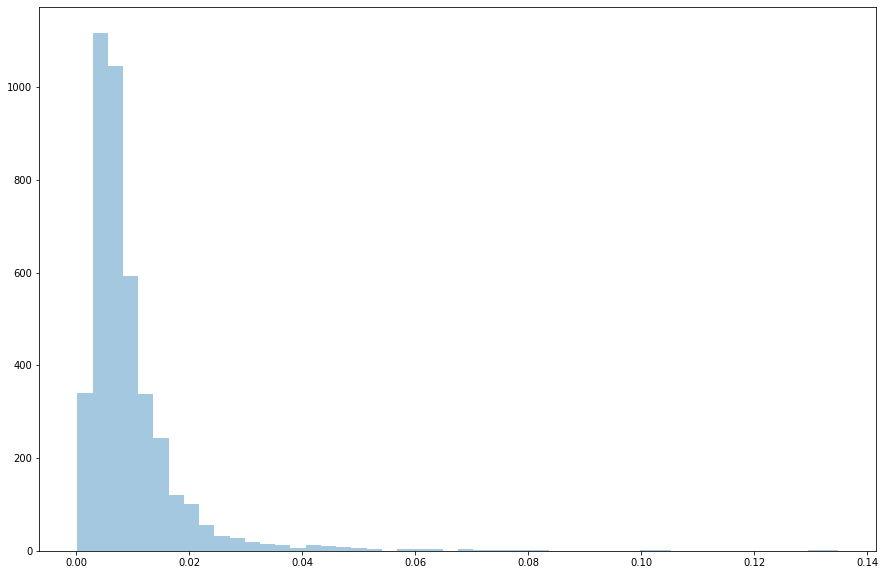

In [42]:
degree = nx.degree_centrality(G_reduce_1)
plt.figure(figsize=(15,10));
sns.distplot(list(degree.values()), kde=False)

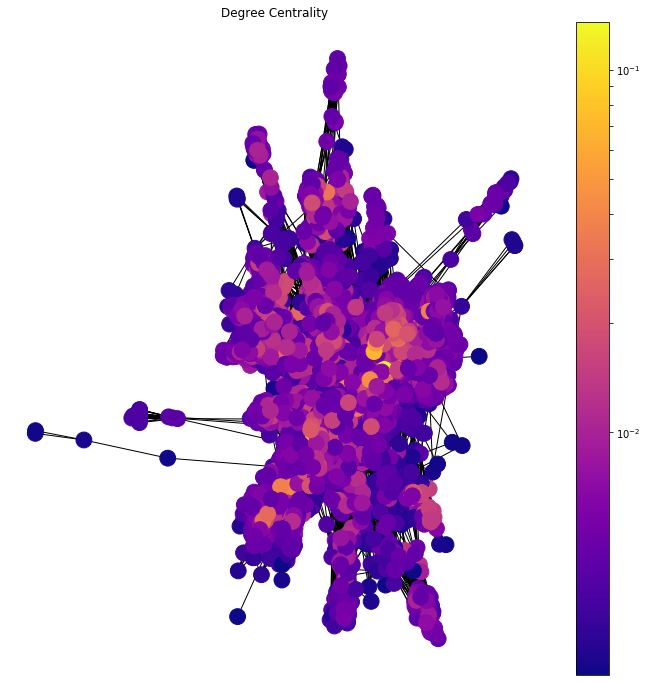

In [45]:
plt.figure(figsize=(12,12))
#pos = nx.spring_layout(G_reduce_1)
draw(G_reduce_1, pos, degree, 'Degree Centrality')

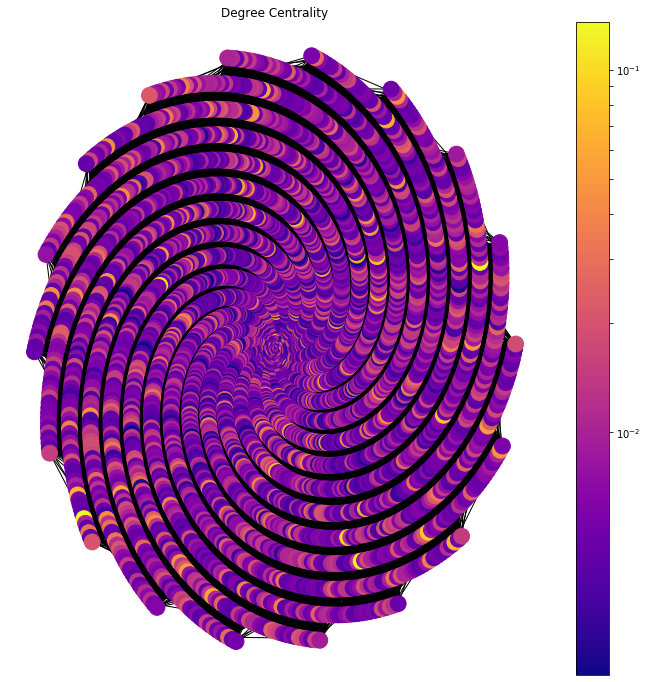

In [83]:
plt.figure(figsize=(12,12))
pos = nx.spiral_layout(G_reduce_1)
draw(G_reduce_1, pos, degree, 'Degree Centrality')

In [46]:
sorted_dc = sorted(degree.items(), key= lambda item: item[1], reverse= True)


In [47]:
print('Best 10 Degree Centrality:')
for i in range(10):
       print(str(i+ 1)+ '. ' + str(sorted_dc[i][0])+ ': ' + str(sorted_dc[i][1]))


Best 10 Degree Centrality:
1. 19743: 0.1348803480783176
2. 21729: 0.13246313753927969
3. 16895: 0.1310128112158569
4. 1387: 0.10394005317863186
5. 14497: 0.10248972685520909
6. 10379: 0.10055595842397873
7. 19347: 0.08170171621948272
8. 8139: 0.07855934251873338
9. 10426: 0.07855934251873338
10. 15236: 0.077834179357022


In [48]:
for i in range(10):
    print(str(i+1) +'. '+ str(G.nodes[i]) +str(sorted_dc[i][0])+': '+str(sorted_dc[i][1]))
    print('')

1. {'facebookid': 145647315578475, 'pagename': 'The Voice of China 中国好声音', 'pagetype': 'tvshow'}19743: 0.1348803480783176

2. {'facebookid': 191483281412, 'pagename': 'U.S. Consulate General Mumbai', 'pagetype': 'government'}21729: 0.13246313753927969

3. {'facebookid': 144761358898518, 'pagename': 'ESET', 'pagetype': 'company'}16895: 0.1310128112158569

4. {'facebookid': 568700043198473, 'pagename': 'Consulate General of Switzerland in Montreal', 'pagetype': 'government'}1387: 0.10394005317863186

5. {'facebookid': 1408935539376139, 'pagename': 'Mark Bailey MP - Labor for Miller', 'pagetype': 'politician'}14497: 0.10248972685520909

6. {'facebookid': 134464673284112, 'pagename': 'Victor Dominello MP', 'pagetype': 'politician'}10379: 0.10055595842397873

7. {'facebookid': 282657255260177, 'pagename': 'Jean-Claude Poissant', 'pagetype': 'politician'}19347: 0.08170171621948272

8. {'facebookid': 239338246176789, 'pagename': 'Deputado Ademir Camilo', 'pagetype': 'politician'}8139: 0.07855

In [104]:
# for i in range(10):
#     print(str(i+1) +'. '+ str(G.nodes[i]))
#     print('')

1. {'facebookid': 145647315578475, 'pagename': 'The Voice of China 中国好声音', 'pagetype': 'tvshow'}

2. {'facebookid': 191483281412, 'pagename': 'U.S. Consulate General Mumbai', 'pagetype': 'government'}

3. {'facebookid': 144761358898518, 'pagename': 'ESET', 'pagetype': 'company'}

4. {'facebookid': 568700043198473, 'pagename': 'Consulate General of Switzerland in Montreal', 'pagetype': 'government'}

5. {'facebookid': 1408935539376139, 'pagename': 'Mark Bailey MP - Labor for Miller', 'pagetype': 'politician'}

6. {'facebookid': 134464673284112, 'pagename': 'Victor Dominello MP', 'pagetype': 'politician'}

7. {'facebookid': 282657255260177, 'pagename': 'Jean-Claude Poissant', 'pagetype': 'politician'}

8. {'facebookid': 239338246176789, 'pagename': 'Deputado Ademir Camilo', 'pagetype': 'politician'}

9. {'facebookid': 544818128942324, 'pagename': 'T.C. Mezar-ı Şerif Başkonsolosluğu', 'pagetype': 'government'}

10. {'facebookid': 285155655705, 'pagename': 'Army ROTC Fighting Saints Battal

## Betweenness centrality

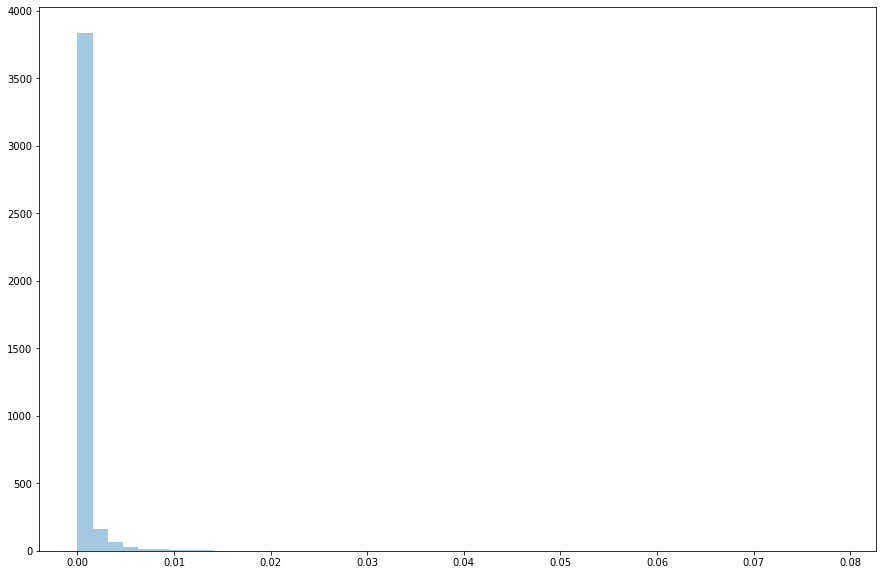

In [49]:
bet = nx.betweenness_centrality(G_reduce_1)
plt.figure(figsize=(15,10))
sns.distplot(list(bet.values()), kde=False);

In [50]:
sorted_bc = sorted(bet.items(), key= lambda item: item[1], reverse= True)

In [51]:
print('Best 10 Betweennes Centrality:')
for l in range(10):
       print(str(l+ 1)+ '. ' + str(sorted_bc[l][0])+ ': ' + str(sorted_bc[l][1]))

Best 10 Betweennes Centrality:
1. 11003: 0.0787759998095439
2. 21729: 0.06949968875077028
3. 19743: 0.06904391335892893
4. 701: 0.03652981596309869
5. 22171: 0.0326337450468189
6. 10379: 0.03194151852481163
7. 21120: 0.03015734211268552
8. 18819: 0.02602851325768117
9. 16895: 0.02512337424423291
10. 11611: 0.024229502777339287


In [67]:
print(G.nodes[11003])
print(G.nodes[21729])
print(G.nodes[19743])
print(G.nodes[701])
print(G.nodes[22171])
print(G.nodes[10379])
print(G.nodes[21120])
print(G.nodes[18819])
print(G.nodes[16895])
print(G.nodes[11611])

{'facebookid': 6815841748, 'pagename': 'Barack Obama', 'pagetype': 'politician'}
{'facebookid': 63811549237, 'pagename': 'The Obama White House', 'pagetype': 'government'}
{'facebookid': 1191441824276882, 'pagename': 'The White House', 'pagetype': 'government'}
{'facebookid': 20531316728, 'pagename': 'Facebook', 'pagetype': 'company'}
{'facebookid': 38802554124, 'pagename': 'U.S. Embassy Ottawa', 'pagetype': 'government'}
{'facebookid': 15877306073, 'pagename': 'U.S. Department of State', 'pagetype': 'government'}
{'facebookid': 178362315106, 'pagename': 'European Parliament', 'pagetype': 'government'}
{'facebookid': 601163706652420, 'pagename': 'Niels Annen', 'pagetype': 'politician'}
{'facebookid': 44053938557, 'pagename': 'U.S. Army', 'pagetype': 'government'}
{'facebookid': 21751825648, 'pagename': 'Justin Trudeau', 'pagetype': 'politician'}


## Closenss centrality

In [57]:
closeness_centrality_d = nx.closeness_centrality(G_reduce_1)

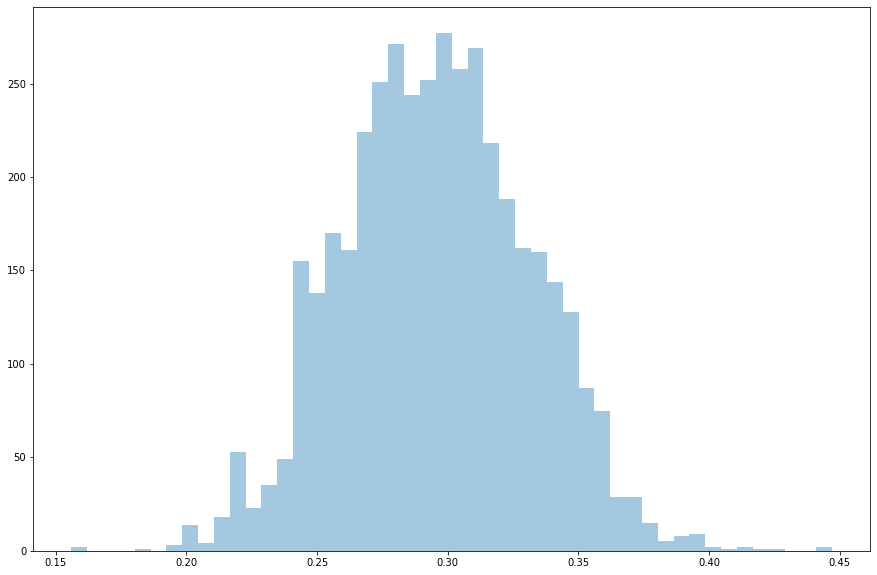

In [58]:
plt.figure(figsize=(15,10))
sns.distplot(list(closeness_centrality_d.values()), kde=False);

In [59]:
sorted_cc = sorted(closeness_centrality_d.items(), key= lambda item: item[1], reverse= True)

In [60]:
print('Best 10 Closeness Centrality:')
for l in range(10):
       print(str(l+ 1)+ '. ' + str(sorted_cc[l][0])+ ': ' + str(sorted_cc[l][1]))

Best 10 Closeness Centrality:
1. 19743: 0.4470982384091646
2. 21729: 0.4469533275713051
3. 11003: 0.4228764182766023
4. 10379: 0.4219275879653238
5. 22171: 0.4150697301093609
6. 16895: 0.4112734864300626
7. 701: 0.4068246631920543
8. 1387: 0.40455701153921375
9. 8482: 0.4035310183378853
10. 19347: 0.3969868534689569


In [66]:
print(G.nodes[19743])
print(G.nodes[21729])
print(G.nodes[11003])
print(G.nodes[10379])
print(G.nodes[22171])
print(G.nodes[16895])
print(G.nodes[701])
print(G.nodes[1387])
print(G.nodes[8482])
print(G.nodes[19347])

{'facebookid': 1191441824276882, 'pagename': 'The White House', 'pagetype': 'government'}
{'facebookid': 63811549237, 'pagename': 'The Obama White House', 'pagetype': 'government'}
{'facebookid': 6815841748, 'pagename': 'Barack Obama', 'pagetype': 'politician'}
{'facebookid': 15877306073, 'pagename': 'U.S. Department of State', 'pagetype': 'government'}
{'facebookid': 38802554124, 'pagename': 'U.S. Embassy Ottawa', 'pagetype': 'government'}
{'facebookid': 44053938557, 'pagename': 'U.S. Army', 'pagetype': 'government'}
{'facebookid': 20531316728, 'pagename': 'Facebook', 'pagetype': 'company'}
{'facebookid': 155837727772692, 'pagename': 'Honolulu District, U.S. Army Corps of Engineers', 'pagetype': 'government'}
{'facebookid': 146599018696771, 'pagename': 'NATO', 'pagetype': 'government'}
{'facebookid': 78922439964, 'pagename': 'FEMA Federal Emergency Management Agency', 'pagetype': 'government'}


In [79]:
print('Worst 10 Closeness Centrality:')

for i in range(-1,-11,-1):
    print(str(-i)+ '. ' + str(sorted_cc[i][0])+ ': ' + str(sorted_cc[i][1]))

Worst 10 Closeness Centrality:
1. 13385: 0.1559660697455231
2. 9000: 0.1559660697455231
3. 10734: 0.18476998660116123
4. 3826: 0.1938340439488357
5. 4275: 0.19761165512299977
6. 3303: 0.19761165512299977
7. 14178: 0.20233786559718284
8. 12096: 0.2040645193113994
9. 2635: 0.2040645193113994
10. 6876: 0.20407458563535913


In [80]:
print(G.nodes[13385])
print(G.nodes[9000])
print(G.nodes[10734])
print(G.nodes[3826])
print(G.nodes[4275])
print(G.nodes[3303])
print(G.nodes[14178])
print(G.nodes[12096])
print(G.nodes[2635])
print(G.nodes[6876])

{'facebookid': 1580633408837996, 'pagename': 'Neil Gray MP', 'pagetype': 'politician'}
{'facebookid': 667427310036806, 'pagename': 'Kirsten Oswald - East Ren', 'pagetype': 'politician'}
{'facebookid': 904819546225376, 'pagename': 'Drew Hendry MP', 'pagetype': 'politician'}
{'facebookid': 144025922495, 'pagename': "L'OCCITANE en Provence", 'pagetype': 'company'}
{'facebookid': 166804205826, 'pagename': 'Crocs', 'pagetype': 'company'}
{'facebookid': 416217435088348, 'pagename': 'Crocs', 'pagetype': 'company'}
{'facebookid': 27449926402, 'pagename': "L'OCCITANE en Provence", 'pagetype': 'company'}
{'facebookid': 10150095549590634, 'pagename': "L'OCCITANE en Provence", 'pagetype': 'company'}
{'facebookid': 101606739942975, 'pagename': "L'OCCITANE en Provence", 'pagetype': 'company'}
{'facebookid': 104843660997, 'pagename': "L'OCCITANE en Provence", 'pagetype': 'company'}


## Eigenvector centrality

In [68]:
eigenvector_centrality = nx.eigenvector_centrality(G_reduce_1)

In [69]:
sorted_ec = sorted(eigenvector_centrality.items(), key= lambda item: item[1], reverse= True)

In [70]:
print('Best 10 Eigenvector Centrality:')
for l in range(10):
       print(str(l+ 1)+ '. ' + str(sorted_ec[l][0])+ ': ' + str(sorted_ec[l][1]))

Best 10 Eigenvector Centrality:
1. 16895: 0.17114325901284388
2. 14497: 0.15123194312910815
3. 1387: 0.13632111675016137
4. 8139: 0.12034415104638818
5. 2442: 0.11756984138162581
6. 19743: 0.11634807401077905
7. 4502: 0.11623413658568531
8. 21729: 0.11540241940884859
9. 15236: 0.10855149631347016
10. 9220: 0.10792544232091943


In [71]:
print(G.nodes[16895])
print(G.nodes[14497])
print(G.nodes[1387])
print(G.nodes[8139])
print(G.nodes[2442])
print(G.nodes[19743])
print(G.nodes[4502])
print(G.nodes[21729])
print(G.nodes[15236])
print(G.nodes[9220])

{'facebookid': 44053938557, 'pagename': 'U.S. Army', 'pagetype': 'government'}
{'facebookid': 404391086302925, 'pagename': 'U.S. Army Chaplain Corps', 'pagetype': 'government'}
{'facebookid': 155837727772692, 'pagename': 'Honolulu District, U.S. Army Corps of Engineers', 'pagetype': 'government'}
{'facebookid': 136880189673357, 'pagename': 'Defense Commissary Agency', 'pagetype': 'government'}
{'facebookid': 212025308879899, 'pagename': 'Army Training Network (ATN)', 'pagetype': 'government'}
{'facebookid': 1191441824276882, 'pagename': 'The White House', 'pagetype': 'government'}
{'facebookid': 119621891000, 'pagename': 'U.S. Army Materiel Command', 'pagetype': 'government'}
{'facebookid': 63811549237, 'pagename': 'The Obama White House', 'pagetype': 'government'}
{'facebookid': 119105629988, 'pagename': 'United States Air Force', 'pagetype': 'government'}
{'facebookid': 246854871491, 'pagename': 'U.S. Army Garrison Red Cloud', 'pagetype': 'government'}


In [78]:
print('Worst 10 Eigenvector Centrality:')

for i in range(-1,-11,-1):
    print( str(-i)+ '. ' + str(sorted_ec[i][0])+ ': ' + str(sorted_ec[i][1]))

Worst 10 Eigenvector Centrality:
1. 13385: 2.537156967981889e-10
2. 9000: 2.537156967981889e-10
3. 10734: 2.5611361445604925e-08
4. 3826: 4.5027690610552325e-08
5. 14178: 5.820738929395165e-08
6. 12096: 8.073596893853351e-08
7. 2635: 8.106123090003949e-08
8. 6876: 8.179661925077182e-08
9. 18642: 8.274300463266727e-08
10. 5420: 8.317150479454605e-08


In [77]:
print(G.nodes[13385])
print(G.nodes[9000])
print(G.nodes[10734])
print(G.nodes[3826])
print(G.nodes[14178])
print(G.nodes[12096])
print(G.nodes[2635])
print(G.nodes[6876])
print(G.nodes[18642])
print(G.nodes[5420])

{'facebookid': 1580633408837996, 'pagename': 'Neil Gray MP', 'pagetype': 'politician'}
{'facebookid': 667427310036806, 'pagename': 'Kirsten Oswald - East Ren', 'pagetype': 'politician'}
{'facebookid': 904819546225376, 'pagename': 'Drew Hendry MP', 'pagetype': 'politician'}
{'facebookid': 144025922495, 'pagename': "L'OCCITANE en Provence", 'pagetype': 'company'}
{'facebookid': 27449926402, 'pagename': "L'OCCITANE en Provence", 'pagetype': 'company'}
{'facebookid': 10150095549590634, 'pagename': "L'OCCITANE en Provence", 'pagetype': 'company'}
{'facebookid': 101606739942975, 'pagename': "L'OCCITANE en Provence", 'pagetype': 'company'}
{'facebookid': 104843660997, 'pagename': "L'OCCITANE en Provence", 'pagetype': 'company'}
{'facebookid': 151619511591812, 'pagename': "L'OCCITANE en Provence", 'pagetype': 'company'}
{'facebookid': 132128000130581, 'pagename': "L'OCCITANE en Provence", 'pagetype': 'company'}


# Community Detection and Network Visualization

In [72]:
from networkx.algorithms import community

communities = community.greedy_modularity_communities(G_reduce_1)
communities

[frozenset({4097,
            10246,
            6151,
            14,
            16398,
            4112,
            6160,
            18,
            6162,
            2068,
            10261,
            14356,
            18448,
            8216,
            16408,
            26,
            2075,
            6171,
            18454,
            2078,
            6175,
            4131,
            12324,
            2085,
            8232,
            4137,
            16425,
            14379,
            12332,
            12337,
            50,
            18482,
            10294,
            56,
            4153,
            12347,
            12348,
            20539,
            10303,
            12353,
            8263,
            14409,
            6218,
            6222,
            10318,
            18512,
            20559,
            18514,
            12371,
            16467,
            16470,
            88,
            6232,
            90,
            164

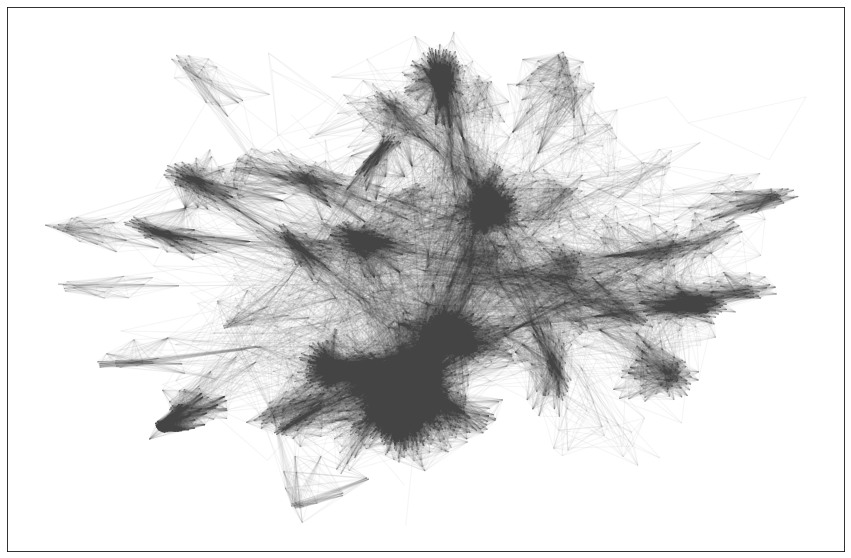

In [48]:
    pos = nx.spring_layout(G_reduce_1, k=0.1)
    plt.rcParams.update({'figure.figsize': (15, 10)})
    nx.draw_networkx(
        G_reduce_1, 
        pos=pos, 
        node_size=0, 
        edge_color="#444444", 
        alpha=0.05, 
        with_labels=False)

In [55]:
from networkx.algorithms import community

In [56]:
communitiess = sorted(community.greedy_modularity_communities(G_reduce_1), key=len, reverse=True)
len(communitiess)

12

In [60]:
    def set_node_community(G, communities):
        '''Add community to node attributes'''
        for c, v_c in enumerate(communities):
            for v in v_c:
                # Add 1 to save 0 for external edges
                G.nodes[v]['community'] = c + 1

    def set_edge_community(G):
        '''Find internal edges and add their community to their attributes'''
        for v, w, in G.edges:
            if G.nodes[v]['community'] == G.nodes[w]['community']:
                # Internal edge, mark with community
                G.edges[v, w]['community'] = G.nodes[v]['community']
            else:
                # External edge, mark as 0
                G.edges[v, w]['community'] = 0

    def get_color(i, r_off=1, g_off=1, b_off=1):
        '''Assign a color to a vertex.'''
        r0, g0, b0 = 0, 0, 0
        n = 16
        low, high = 0.1, 0.9
        span = high - low
        r = low + span * (((i + r_off) * 3) % n) / (n - 1)
        g = low + span * (((i + g_off) * 5) % n) / (n - 1)
        b = low + span * (((i + b_off) * 7) % n) / (n - 1)
        return (r, g, b)      

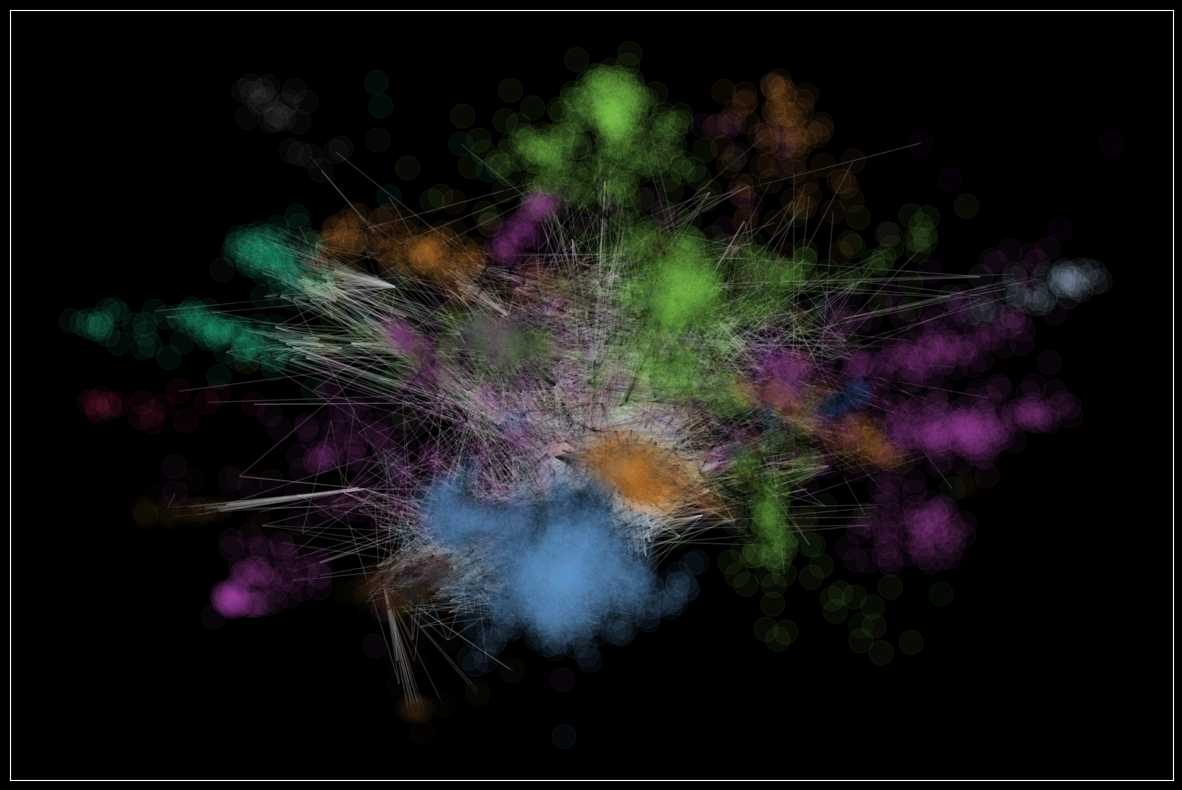

In [61]:
    plt.rcParams.update(plt.rcParamsDefault)
    plt.rcParams.update({'figure.figsize': (15, 10)})
    plt.style.use('dark_background')

    # Set node and edge communities
    set_node_community(G_reduce_1, communitiess)
    set_edge_community(G_reduce_1)

    # Set community color for internal edges
    external = [(v, w) for v, w in G_reduce_1.edges if G_reduce_1.edges[v, w]['community'] == 0]
    internal = [(v, w) for v, w in G_reduce_1.edges if G_reduce_1.edges[v, w]['community'] > 0]
    internal_color = ["black" for e in internal]
    node_color = [get_color(G_reduce_1.nodes[v]['community']) for v in G_reduce_1.nodes]
    # external edges
    nx.draw_networkx(
        G_reduce_1, 
        pos=pos, 
        node_size=0, 
        edgelist=external, 
        edge_color="silver",
        node_color=node_color,
        alpha=0.2, 
        with_labels=False)
    # internal edges
    nx.draw_networkx(
        G_reduce_1, 
        pos=pos, 
        edgelist=internal, 
        edge_color=internal_color,
        node_color=node_color,
        alpha=0.05, 
        with_labels=False)

## Cliques detection

Una Cliques, in italiano "cricca", è un sottoinsieme di vertici di un grafo non orientato in modo tale che ogni due vertici distinti nella cricca siano adiacenti; cioè, il suo sottografo indotto è completo. Le cliques sono in un certo senso comunità strette in cui ogni nodo è connesso tra loro.

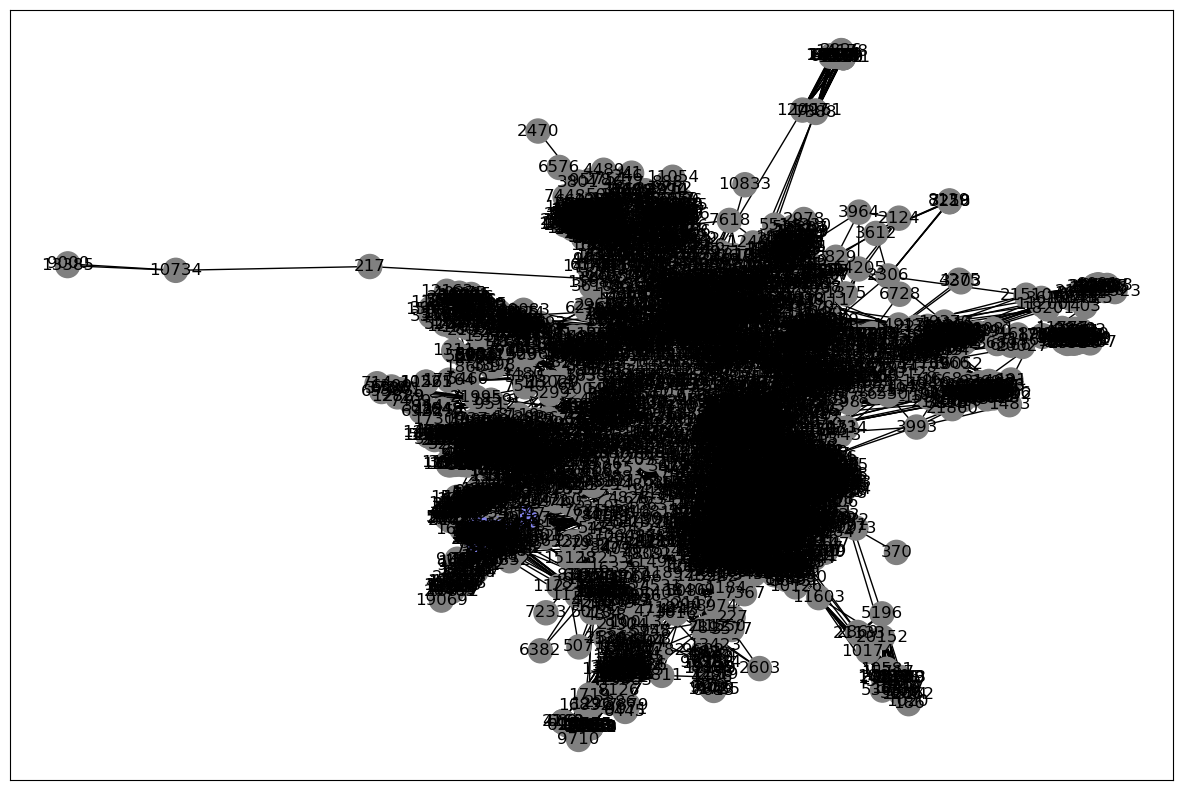

In [62]:
    plt.rcParams.update(plt.rcParamsDefault)
    plt.rcParams.update({'figure.figsize': (15, 10)})
    cliques = list(nx.find_cliques(G_reduce_1))
    max_clique = max(cliques, key=len)
    node_color = [(0.5, 0.5, 0.5) for v in G_reduce_1.nodes()]
    for i, v in enumerate(G_reduce_1.nodes()):
        if v in max_clique:
            node_color[i] = (0.5, 0.5, 0.9)
    nx.draw_networkx(G_reduce_1, node_color=node_color)

In [64]:
print(max_clique)

[44, 3074, 9996, 3981, 4751, 5010, 13074, 5525, 20889, 21274, 3103, 20516, 19621, 7978, 4527, 4401, 21681, 6706, 7606, 17591, 568, 18235, 20037, 6398, 5317, 839, 20168, 12745, 21324, 18638, 11473, 1618, 13140, 5589, 8795, 9567, 21087, 2532, 1126, 16105, 18539, 4077, 18167, 1517, 14703, 7919, 11248, 12025, 19964, 8062, 18624, 11850, 7288, 2160, 19127]


In [70]:
nodi =[]
for i in range(len(max_clique)):
    nodi.append(max_clique[i])

In [76]:
for i in range(len(nodi)):
    print(G_reduce_1.nodes[nodi[i]])

{'ID': 44, 'facebookid': 1507698529534072, 'pagename': 'APB FOX', 'pagetype': 'tvshow', 'community': 3}
{'ID': 3074, 'facebookid': 14176232250, 'pagename': '24: Legacy', 'pagetype': 'tvshow', 'community': 3}
{'ID': 9996, 'facebookid': 262298737144442, 'pagename': 'Hotel Hell', 'pagetype': 'tvshow', 'community': 3}
{'ID': 3981, 'facebookid': 212411822583153, 'pagename': 'Ghosted', 'pagetype': 'tvshow', 'community': 3}
{'ID': 4751, 'facebookid': 126204090726016, 'pagename': 'MasterChef', 'pagetype': 'tvshow', 'community': 3}
{'ID': 5010, 'facebookid': 1669295546644858, 'pagename': 'Shots Fired', 'pagetype': 'tvshow', 'community': 3}
{'ID': 13074, 'facebookid': 1132457260127719, 'pagename': 'Kicking & Screaming', 'pagetype': 'tvshow', 'community': 3}
{'ID': 5525, 'facebookid': 1859450307624772, 'pagename': 'Showtime At The Apollo', 'pagetype': 'tvshow', 'community': 3}
{'ID': 20889, 'facebookid': 998610450211794, 'pagename': 'Making History', 'pagetype': 'tvshow', 'community': 3}
{'ID': 2

In [83]:
max_community = max(communitiess, key=len)

In [3]:
# print(max_community)

In [89]:
max_community_backup = max_community

## Communities report

### Comunità 1, la più grande

In [104]:
print(G_reduce_1.nodes[4097])
print(G_reduce_1.nodes[10246])
print(G_reduce_1.nodes[6151])
print(G_reduce_1.nodes[14])
print(G_reduce_1.nodes[16398])

{'ID': 4097, 'facebookid': 114364722909, 'pagename': 'U.S. Army Space and Missile Defense Command (SMDC)', 'pagetype': 'government', 'community': 1}
{'ID': 10246, 'facebookid': 130918506984758, 'pagename': 'US National Weather Service Columbia South Carolina', 'pagetype': 'government', 'community': 1}
{'ID': 6151, 'facebookid': 19728909942, 'pagename': 'U.S. Army John F. Kennedy Special Warfare Center and School', 'pagetype': 'government', 'community': 1}
{'ID': 14, 'facebookid': 374623305761, 'pagename': "NASA's Marshall Space Flight Center", 'pagetype': 'government', 'community': 1}
{'ID': 16398, 'facebookid': 127036233989057, 'pagename': 'Coaching Into Care', 'pagetype': 'government', 'community': 1}


### Comunità 2, la seconda più popolosa

In [112]:
print(G_reduce_1.nodes[10241])
print(G_reduce_1.nodes[2051])
print(G_reduce_1.nodes[8197])
print(G_reduce_1.nodes[4106])
print(G_reduce_1.nodes[2059])
print(G_reduce_1.nodes[10252])
print(G_reduce_1.nodes[14348])
print(G_reduce_1.nodes[14350])

{'ID': 10241, 'facebookid': 218434258171162, 'pagename': 'EU Law and Publications', 'pagetype': 'government', 'community': 2}
{'ID': 2051, 'facebookid': 598216760241817, 'pagename': 'Anton Hofreiter', 'pagetype': 'politician', 'community': 2}
{'ID': 8197, 'facebookid': 439052496231941, 'pagename': 'Ministero delle politiche agricole alimentari e forestali', 'pagetype': 'government', 'community': 2}
{'ID': 4106, 'facebookid': 125817437499137, 'pagename': 'Embassy of the Netherlands in Rwanda', 'pagetype': 'government', 'community': 2}
{'ID': 2059, 'facebookid': 408541229160361, 'pagename': 'Campus France', 'pagetype': 'government', 'community': 2}
{'ID': 10252, 'facebookid': 421166261302591, 'pagename': 'Ministerio de Asuntos Exteriores y de Cooperación de España', 'pagetype': 'government', 'community': 2}
{'ID': 14348, 'facebookid': 162712740406569, 'pagename': 'Embassy of the Netherlands in Ireland', 'pagetype': 'government', 'community': 2}
{'ID': 14350, 'facebookid': 664322156963115

### Comunità 3, la terza più popolosa

In [113]:
print(G_reduce_1.nodes[4])
print(G_reduce_1.nodes[5])
print(G_reduce_1.nodes[44])
print(G_reduce_1.nodes[49])
print(G_reduce_1.nodes[101])
print(G_reduce_1.nodes[106])
print(G_reduce_1.nodes[113])
print(G_reduce_1.nodes[129])

{'ID': 4, 'facebookid': 1408935539376139, 'pagename': 'Mark Bailey MP - Labor for Miller', 'pagetype': 'politician', 'community': 3}
{'ID': 5, 'facebookid': 134464673284112, 'pagename': 'Victor Dominello MP', 'pagetype': 'politician', 'community': 3}
{'ID': 44, 'facebookid': 1507698529534072, 'pagename': 'APB FOX', 'pagetype': 'tvshow', 'community': 3}
{'ID': 49, 'facebookid': 130096562306, 'pagename': 'Digicel', 'pagetype': 'company', 'community': 3}
{'ID': 101, 'facebookid': 104513569620273, 'pagename': 'The X Factor (USA)', 'pagetype': 'tvshow', 'community': 3}
{'ID': 106, 'facebookid': 145794842231097, 'pagename': 'Chad Griffith - Lake Macquarie', 'pagetype': 'politician', 'community': 3}
{'ID': 113, 'facebookid': 404948826259784, 'pagename': 'Senator James McGrath', 'pagetype': 'politician', 'community': 3}
{'ID': 129, 'facebookid': 173347701125, 'pagename': 'Governor Jan Brewer', 'pagetype': 'politician', 'community': 3}


### Comunità 12, la quarta più popolosa

In [108]:
print(G_reduce_1.nodes[217])
print(G_reduce_1.nodes[9000])
print(G_reduce_1.nodes[10734])
print(G_reduce_1.nodes[13385])


{'ID': 217, 'facebookid': 330250343871, 'pagename': 'Jeremy Corbyn', 'pagetype': 'politician', 'community': 12}
{'ID': 9000, 'facebookid': 667427310036806, 'pagename': 'Kirsten Oswald - East Ren', 'pagetype': 'politician', 'community': 12}
{'ID': 10734, 'facebookid': 904819546225376, 'pagename': 'Drew Hendry MP', 'pagetype': 'politician', 'community': 12}
{'ID': 13385, 'facebookid': 1580633408837996, 'pagename': 'Neil Gray MP', 'pagetype': 'politician', 'community': 12}


# Ego Network

In [28]:
nodes_degrees = G_reduce_1.degree()
top_deg_node = max(nodes_degrees, key= lambda item: item[1])
print( '\033[1m' + 'Page with the gratest number of connections:' + '\033[0m' + str(top_deg_node[0])+ ' (' + str(top_deg_node[1])+ ')' )

Page with the gratest number of connections:19743 (558)


In [ ]:
nodes_degrees = G_reduce_1.degree()
top_deg_node = max(nodes_degrees, key= lambda item: item[1])
print( '\033[1m' + 'Page with the gratest number of connections:' + '\033[0m' + str(top_deg_node[0])+
      ' (' + str(top_deg_node[1])+ ')' )

In [43]:
print(G_reduce_1.nodes[19743])

{'facebookid': 1191441824276882, 'pagename': 'The White House', 'pagetype': 'government', 'modularity': 0}


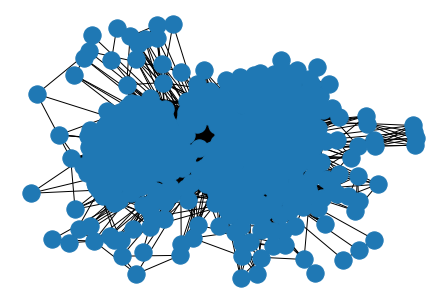

In [121]:
ego_network = nx.ego_graph(G_reduce_1, top_deg_node[0])
nx.draw(ego_network)

grafico senza i nodi dando l'idea della rete e dei collegamenti

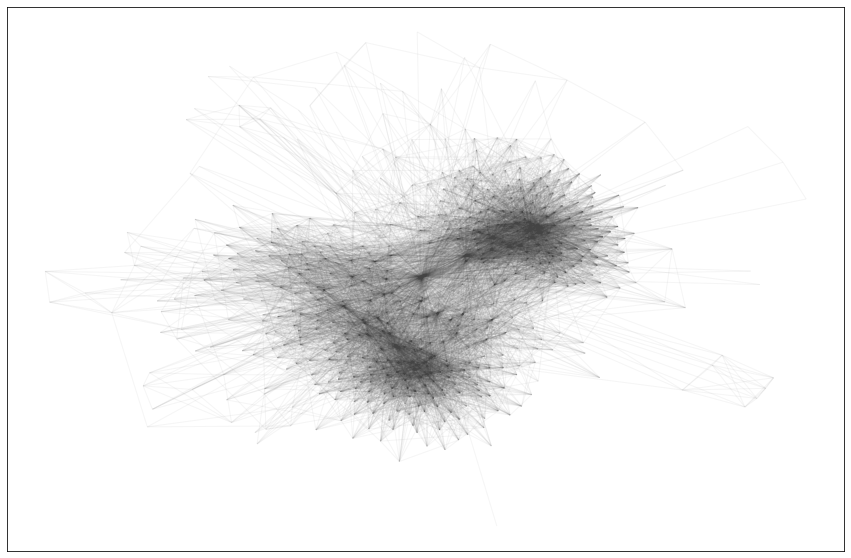

In [30]:
    pos = nx.spring_layout(ego_network, k=0.1)
    plt.rcParams.update({'figure.figsize': (15, 10)})
    nx.draw_networkx(
        ego_network, 
        pos=pos, 
        node_size=0, 
        edge_color="#444444", 
        alpha=0.05, 
        with_labels=False)

EGO network centrata sul nodo in base a quello con grado più alto, risulta essere la pagine Withe House. Questi sono tutti i colegamenti della pagina facebook "The Withe House"

## Group Centrality

### CATEGORIA TVSHOW

In [89]:
tvshow_degree = nx.group_degree_centrality(G, nome_nodo_tvshow)
print( '\033[1m' + 'Degree Centrality for TV show: ' + '\033[0m' + str(tvshow_degree))

Degree Centrality for TV show: 0.12720054327952776


In [90]:
tvshow_closeness = nx.group_closeness_centrality(G, nome_nodo_tvshow)
print ( '\033[1m' + 'Closeness Centrality for TV show:' + '\033[0m' + str(tvshow_closeness))

Closeness Centrality for TV show:0.4424081349664895


In [38]:
tvshow_betweenness = nx.group_betweenness_centrality(G, nome_nodo_tvshow)
print ( '\033[1m' + 'Betweenness Centrality for TV show:' + '\033[0m' + str(politician_closeness))

### CATEGORIA COMPANY

In [92]:
company_degree = nx.group_degree_centrality(G, nome_nodo_company)
print( '\033[1m' + 'Degree Centrality for company: ' + '\033[0m' + str(company_degree))

Degree Centrality for company: 0.21120500782472612


In [93]:
company_closeness = nx.group_closeness_centrality(G, nome_nodo_company)
print( '\033[1m' + 'Closeness Centrality for company: ' + '\033[0m' + str(company_closeness))

Closeness Centrality for company: 0.48756294826796887


In [ ]:
company_betweenness = nx.group_betweenness_centrality(G, nome_nodo_company)
print( '\033[1m' + 'Betweenness Centrality for TV company:' + '\033[0m' + str(politician_closeness))

### CATEGORIA GOVERNMENT

In [94]:
government_degree = nx.group_degree_centrality(G, nome_nodo_government)
print( '\033[1m' + 'Degree Centrality for Government: ' + '\033[0m' + str(government_degree))

Degree Centrality for Government: 0.277421423989737


In [95]:
government_closeness = nx.group_closeness_centrality(G, nome_nodo_government)
print( '\033[1m' + 'Closeness Centrality for Government ' + '\033[0m' + str(government_closeness))

Closeness Centrality for Government 0.483560794044665


In [ ]:
government_betweenness = nx.group_betweenness_centrality(G, nome_nodo_government)
print( '\033[1m' + 'Betweenness Centrality for Government:' + '\033[0m' + str(government_betweenness))

### CATEGORIA POLITICIAN

In [96]:
politician_degree = nx.group_degree_centrality(G, nome_nodo_politician)
print( '\033[1m' + 'Degree Centrality for Politician: ' + '\033[0m' + str(politician_degree))

Degree Centrality for Politician: 0.2005747814632978


In [97]:
politician_closeness = nx.group_closeness_centrality(G, nome_nodo_politician)
print( '\033[1m' + 'Closeness Centrality for Politician: ' + '\033[0m' + str(politician_closeness))

Closeness Centrality for Politician: 0.4374197941492287


In [ ]:
politician_betweenness = nx.group_betweenness_centrality(G, nome_nodo_politician)
print( '\033[1m' + 'Betweenness Centrality for Politician:' + '\033[0m' + str(politician_betweenness))

# Multi-node classification

Obiettivo di questa sezione è la classificazione multiclasse del nodo. Nel nostro caso ogni nodo ha diversi attriburi,tra cui facebookid, il nome e la categoria della pagina. Noi siamo interessati alla tipologia di pagina che caratterizza il nodo. Quindi, in particolare vogliamo predire, a partire dalle caratteristiche del nodo quale sarà la tipologia di pagina per quel nodo.
Per farlo si usa un approccio mulitscala, tramite un algoritmo di rete embedding, una classe di algoritmi che acquisiscono informazioni su un nodo dalla distribuzione locale sugli attributi del nodo attorno ad esso.
Le osservazioni provenienti da vicini di diverse dimensioni sono raggruppati insieme (AE) o codificate separatamente in un approccio multi-scala (detto MUSAE).

In [4]:
from scipy import sparse
from sklearn.metrics import f1_score
from sklearn.decomposition import NMF, TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, ElasticNet

Di seguito viene aggiunto anche il dataset delle features, che contiente due colonne:
La prima colonna è un nodo, la seconda colonna è un identificatore di caratteristiche. Descrive una matrice sparsa.

In [12]:

target = pd.read_csv("C:/Users/gigio/Desktop/prova/Kaggle/musae_facebook_target.csv")
features = pd.read_csv("C:/Users/gigio/Desktop/prova/Kaggle/musae_facebook_features.csv")
edges = pd.read_csv("C:/Users/gigio/Desktop/prova/Kaggle/musae_facebook_edges.csv")

La funzione seguente peremtte di trasformare le features in forma di matrice sparsa

In [13]:
def transform_features_to_sparse(table):
    table["weight"] = 1
    table = table.values.tolist()
    index_1 = [row[0] for row in table]
    index_2 =  [row[1] for row in table]
    values =  [row[2] for row in table] 
    count_1, count_2 = max(index_1)+1, max(index_2)+1
    sp_m = sparse.csr_matrix(sparse.coo_matrix((values,(index_1,index_2)),shape=(count_1,count_2),dtype=np.float32))
    return sp_m

La funzione seguente normalizza la matrice di adiacenza, che contiente i collegamenti tra i nodo di partenza e i nodi di arrivo

In [14]:
def normalize_adjacency(raw_edges):
    raw_edges_t = pd.DataFrame()
    raw_edges_t["id_1"] = raw_edges["id_2"]
    raw_edges_t["id_2"] = raw_edges["id_1"]
    raw_edges = pd.concat([raw_edges,raw_edges_t])
    edges = raw_edges.values.tolist()
    graph = nx.from_edgelist(edges)
    ind = range(len(graph.nodes()))
    degs = [1.0/graph.degree(node) for node in graph.nodes()]
    A = transform_features_to_sparse(raw_edges)
    degs = sparse.csr_matrix(sparse.coo_matrix((degs, (ind, ind)), shape=A.shape,dtype=np.float32))
    A = A.dot(degs)
    return A

funzione ausiliaria per associare un valore al nodo in base alla categoria di appartenenza del nodo

In [15]:
def mapper(x):
    if x =="politician":
        y = 0
    elif x =="company":
        y = 1
    elif x =="government":
        y = 2
    else:
        y = 3
    return y

definisco quali sono le vairaibili X su cui addestro il modello e la variabile Y di interesse da predire, ossia il valore di pagetype

In [16]:
target = target["page_type"].values.tolist()
y = np.array([mapper(t) for t in target])
A = normalize_adjacency(edges)
X = transform_features_to_sparse(features)
X_tilde = A.dot(X)

definisco la funzione che prende X (W) e y in input e addestra le X tramite un modello di regressione logistica. X e Y splittati secondo una divisione 90-10 e in output viene restituito il valore dell'accuratezza del modello valutato in termini di F-1 score.

In [17]:
def eval_factorization(W,y):
    scores = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(W, y, test_size=0.9, random_state = i)
        model = LogisticRegression(C=0.01, solver = "saga",multi_class = "auto")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = f1_score(y_test, y_pred, average = "weighted")
        scores.append(score)
    print(np.mean(scores))

In [18]:
model = TruncatedSVD(n_components=16, random_state=0)
W = model.fit_transform(X)
model = TruncatedSVD(n_components=16, random_state=0)
W_tilde = model.fit_transform(A)

In [19]:
eval_factorization(W, y)
eval_factorization(np.concatenate([W,W_tilde],axis=1), y)

0.6071623347475199
0.6248587880781069


L'accuretezza del modello realizzato è valutata tramite l' F-1 score ed è pari a 0.60 e 0.62 per i due modelli